<a href="https://colab.research.google.com/github/astrrr/Right-posture/blob/detect/posture_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
import pandas as pd

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [26]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/data_pose/train",
                                          target_size=(224,224),
                                          batch_size = 3,
                                          class_mode ="categorical")

validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/data_pose/validation",
                                          target_size=(224,224),
                                          batch_size = 3,
                                          class_mode ="categorical")

Found 88 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [27]:
train_dataset.class_indices

{'correct': 0, 'incorrect': 1}

In [28]:
validation_dataset.class_indices

{'correct': 0, 'incorrect': 1}

In [29]:
INCEPTION = InceptionV3(include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(224,224,3), pooling=max, 
    classifier_activation='softmax')
INCEPTION.trainable = False

In [30]:
model = tf.keras.models.Sequential([
                                    INCEPTION,
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(2, activation='softmax')
                                    
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               26214912  
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 48,281,378
Trainable params: 26,478,594
Non-trainable params: 21,802,784
_________________________________________________________________


In [32]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.000001, rho=0.8, momentum=0.0, centered=True) 
los = tf.keras.losses.binary_crossentropy 
  

model.compile(optimizer=opt, loss=los, metrics=['accuracy'])

In [33]:
model.fit(
    train_dataset, # both data and label cause we use ImageDataGenerator
    batch_size=3,
    epochs=13, ### can be change 
    validation_data= validation_dataset,
    
    shuffle=True 
)


Epoch 1/13
30/30 [==============================] - 10s 136ms/step - loss: 0.6323 - accuracy: 0.6705 - val_loss: 0.6007 - val_accuracy: 0.7500
Epoch 2/13
30/30 [==============================] - 2s 80ms/step - loss: 0.3157 - accuracy: 0.9205 - val_loss: 0.4558 - val_accuracy: 0.8125
Epoch 3/13
30/30 [==============================] - 2s 80ms/step - loss: 0.1654 - accuracy: 1.0000 - val_loss: 0.3651 - val_accuracy: 0.8750
Epoch 4/13
30/30 [==============================] - 2s 80ms/step - loss: 0.0909 - accuracy: 1.0000 - val_loss: 0.3787 - val_accuracy: 0.8750
Epoch 5/13
30/30 [==============================] - 2s 79ms/step - loss: 0.0522 - accuracy: 1.0000 - val_loss: 0.3683 - val_accuracy: 0.8750
Epoch 6/13
30/30 [==============================] - 2s 80ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.3604 - val_accuracy: 0.9375
Epoch 7/13
30/30 [==============================] - 2s 82ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.3899 - val_accuracy: 0.9375
Epoch 8/13


In [34]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


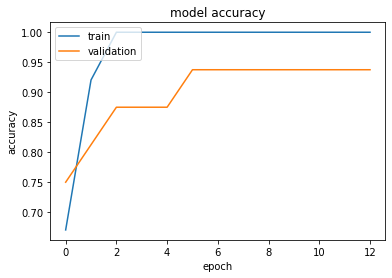

In [35]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

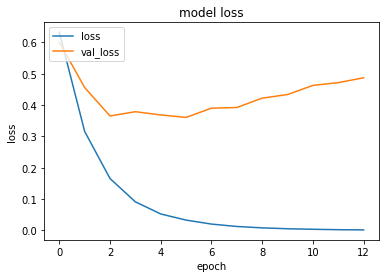

In [36]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

Predict


In [37]:
dir_path = '/content/drive/MyDrive/data_pose/test'

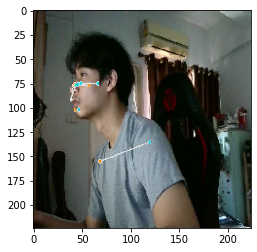

[[5.7360716e-19 1.0000000e+00]] 3in.JPG


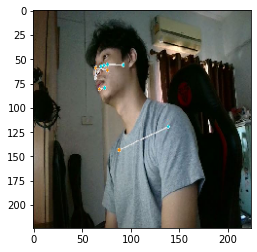

[[9.123048e-15 1.000000e+00]] 5in.JPG


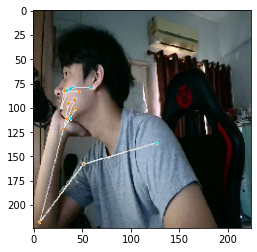

[[1.6617848e-12 1.0000000e+00]] 14in.JPG


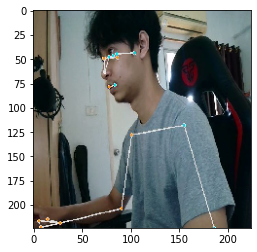

[[3.6835437e-22 1.0000000e+00]] 17in.JPG


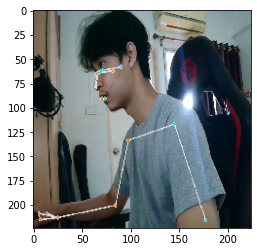

[[2.867927e-14 1.000000e+00]] 18in.JPG


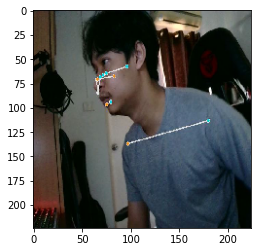

[[3.613617e-09 1.000000e+00]] 43in.JPG


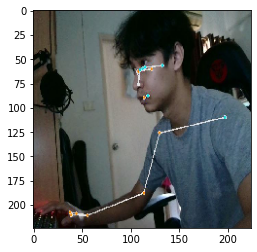

[[1.1963813e-09 1.0000000e+00]] 49in.JPG


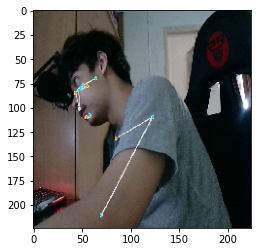

[[4.449272e-08 1.000000e+00]] 56in.JPG


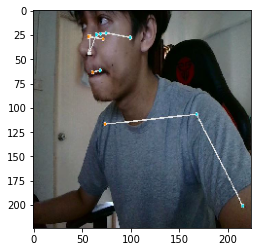

[[2.062393e-12 1.000000e+00]] 61in.JPG


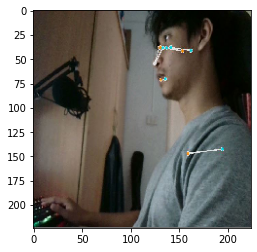

[[5.2662468e-11 1.0000000e+00]] 2cor.JPG


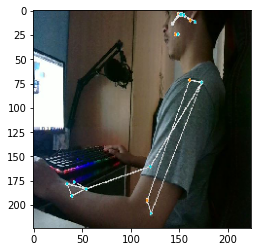

[[1.7888918e-30 1.0000000e+00]] 23cor.JPG


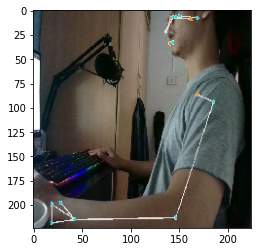

[[0.05249209 0.9475079 ]] 30cor.JPG


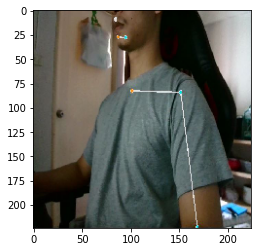

[[5.329329e-15 1.000000e+00]] 33cor.JPG


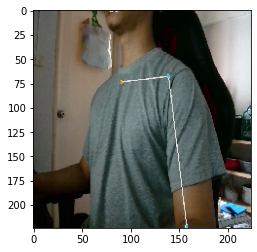

[[2.8676832e-16 1.0000000e+00]] 36cor.JPG


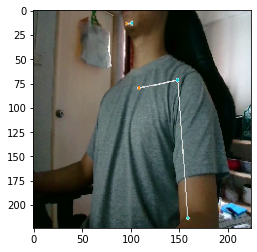

[[3.2392134e-06 9.9999678e-01]] 38cor.JPG


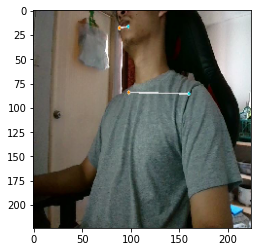

[[8.2415487e-22 1.0000000e+00]] 45cor.JPG


In [38]:
for i in os.listdir(dir_path):
    img = tf.keras.preprocessing.image.load_img(dir_path+'//'+i, target_size=(224,224))
    plt.imshow(img)
    plt.show()

    X= tf.keras.preprocessing.image.img_to_array(img)
    X= np.expand_dims(X,axis=0)
    image = np.vstack([X])
    val = model.predict(image)
    print(val,i)